### <font color='grey' style='font-family:Georgia'>_Data Love Letter_</font>
# <font color='green' style='font-family:Georgia'>BioTIME Database</font>


> To: _DSE_<br> From: _Giulia Zarpellon_<br> Date: _April 2023_

Full citation for the data we are exploring:

> Dornelas M, Antão LH, Moyes F, Bates, AE, Magurran, AE, et al. BioTIME: A database of biodiversity time series for the Anthropocene. Global Ecol Biogeogr. 2018; 27:760 - 786. https://doi.org/10.1111/geb.12729

## <font color='grey' style='font-family:Georgia'>Preliminary</font>

### 1. Why did you choose to explore this dataset among many others?

- [BioTIME](https://biotime.st-andrews.ac.uk/) is a _"global database of assemblage time series for quantifying and understanding biodiversity change"_. Indeed, it claims to be _"the largest compilation of biodiversity time series containing raw data on species identities and abundances from ecological assemblages"_ ([see here](https://biotime.st-andrews.ac.uk/downloads/interactBioTIME.html#using-the-mysql-database)).
- Unlike the [LPI database](https://www.livingplanetindex.org/), this one does not seem to be linked to a particular indicator/index. The database seems to be cited by the community, but I'm not sure of _how_ it's actually been used by scientists (and maybe policy-makers?). The intention behind this exploration is to uncover some of the opportunities this data offers. Because we just explored the LPI data, and both should technically be compilations of "abundance" data<sup>(*)</sup>, we might be able to offer some comparison as well.

<sup>(*)</sup> _This we should check, though!_

### 2. Where did you find this data?

- BioTIME is proudly open-access and free to anyone anywhere (🎉 yay!). [Data usage guidelines](https://biotime.st-andrews.ac.uk/usageGuidelines.php) require respecting the licenses associated to the datasets for each study included in the database, which can vary across the database but should generally be on the open side (Creative Commons and Open Licences, as discussed [here](https://biotime.st-andrews.ac.uk/usageGuidelines.php)). If using particular studies from this data, we should consult their individual licenses carefully. For BioTIME itself, licence should be CC-BY-4.0 (see details [here](https://creativecommons.org/licenses/by/4.0/legalcode)).
- Data can be access through a custom search or in its entirety via the BioTIME [download page](https://biotime.st-andrews.ac.uk/download.php). The dataset is also [hosted in Zenodo](https://zenodo.org/record/5026943#.ZC8o7ezMLdp). Additional files in `.csv` and `.xlsx` contain metadata and citation information. Two main formats are available for the data: 
    1. **Full database SQL zip file** (1.01 GB unzipped). This `.sql` file is meant to be loaded into a MySQL database. 
    2. **Raw data in `.csv` zip file** (1.22 GB unzipped), a table that should summarize the database (see more on this and the database structure below). 

### 3. Who is behind the data?

- As mentioned under "Funding"
> BioTIME is hosted and based at the University of St Andrews. It grew out of two ERC grants (AdG BioTIME 250189 and PoC BioCHANGE 72744) awarded to Professor Anne Magurran. 
- Their [Team webpage](https://biotime.st-andrews.ac.uk/biotimeTeam.php) currently features an all-female core team (!) and explains  the composition of the BioTIME consortium:
> The wider BioTIME consortium comprises many of the data contributors to the database along with enthusiastic University of St Andrews students and staff who assisted with data collection and cleaning. There are 265 BioTIME consortium members based at institutions spanning 35 countries around the globe. 
- While I cannot seem to find a list of Consortium associates, the database contains a `contacts` table with details of who is behind each study, which I believe should correspond to folks who actually contributed data. Data contributors where invited to be co-authors of the [BioTIME data paper](https://onlinelibrary.wiley.com/doi/full/10.1111/geb.12729). There seems to be a positive emphasis on giving credit to data collectors, which reflects on the data use agreement. 
- Submission of contributions is managed via a quite extensive `xlsx` form (link available [here](https://biotime.st-andrews.ac.uk/contribute.php)). In the database, there's also a `curation` table which provide space for further annotations, e.g., the date of when the study was added to the database -- a thing we could not know in the LPI data. Similarly to the LPI data, though, at first glance it looks like the data is sourced from scientific literature only.

### 4. Is the dataset static or living?

- The database should be continuously updated with new entries, and I'll check below on the `curation.DATE_STUDY_ADDED` field to understand how often this happens. In contrast to the LPI data, there are no "official releases" or versions, but additions should be easily tracked using the `curation` table. We have no way of telling whether data is ever removed once contributed. 
- The version used here was downloaded in April 2023, but the filenames are marked with the date `24_06_2021`.

## <font color='grey' style='font-family:Georgia'>First impressions</font>

### 5. What does the data look like?

- The database structure is well documented and BioTIME offers some [examples for data interaction](https://biotime.st-andrews.ac.uk/downloads/interactBioTIME.html#using-the-mysql-database) using R. The same webpage contains an infographic mapping the database structure, which we report below. 
- There are **11 tables** in the database. Metadata description and data types are provided [here](https://biotime.st-andrews.ac.uk/downloads/bioTIMETables_09_02_2017.pdf), and might be a bit outdated (2017 from the filename), not including the `citation1` table. Note that the `BioTIMEMetadata_24_06_2021.csv` contains actual info from tables, and not just metadata description. 
- Instead of spinning a MySQL server, we repackaged the BioTIME database into a SQLite database, which does not require a server (a more secure option). This repackaging allows us to interact with the data directly in Python (using `sqlite3` and `pandas`), without additional installations. The process to repackage the data is documented in **#TODO add link/name here**.

<center>
    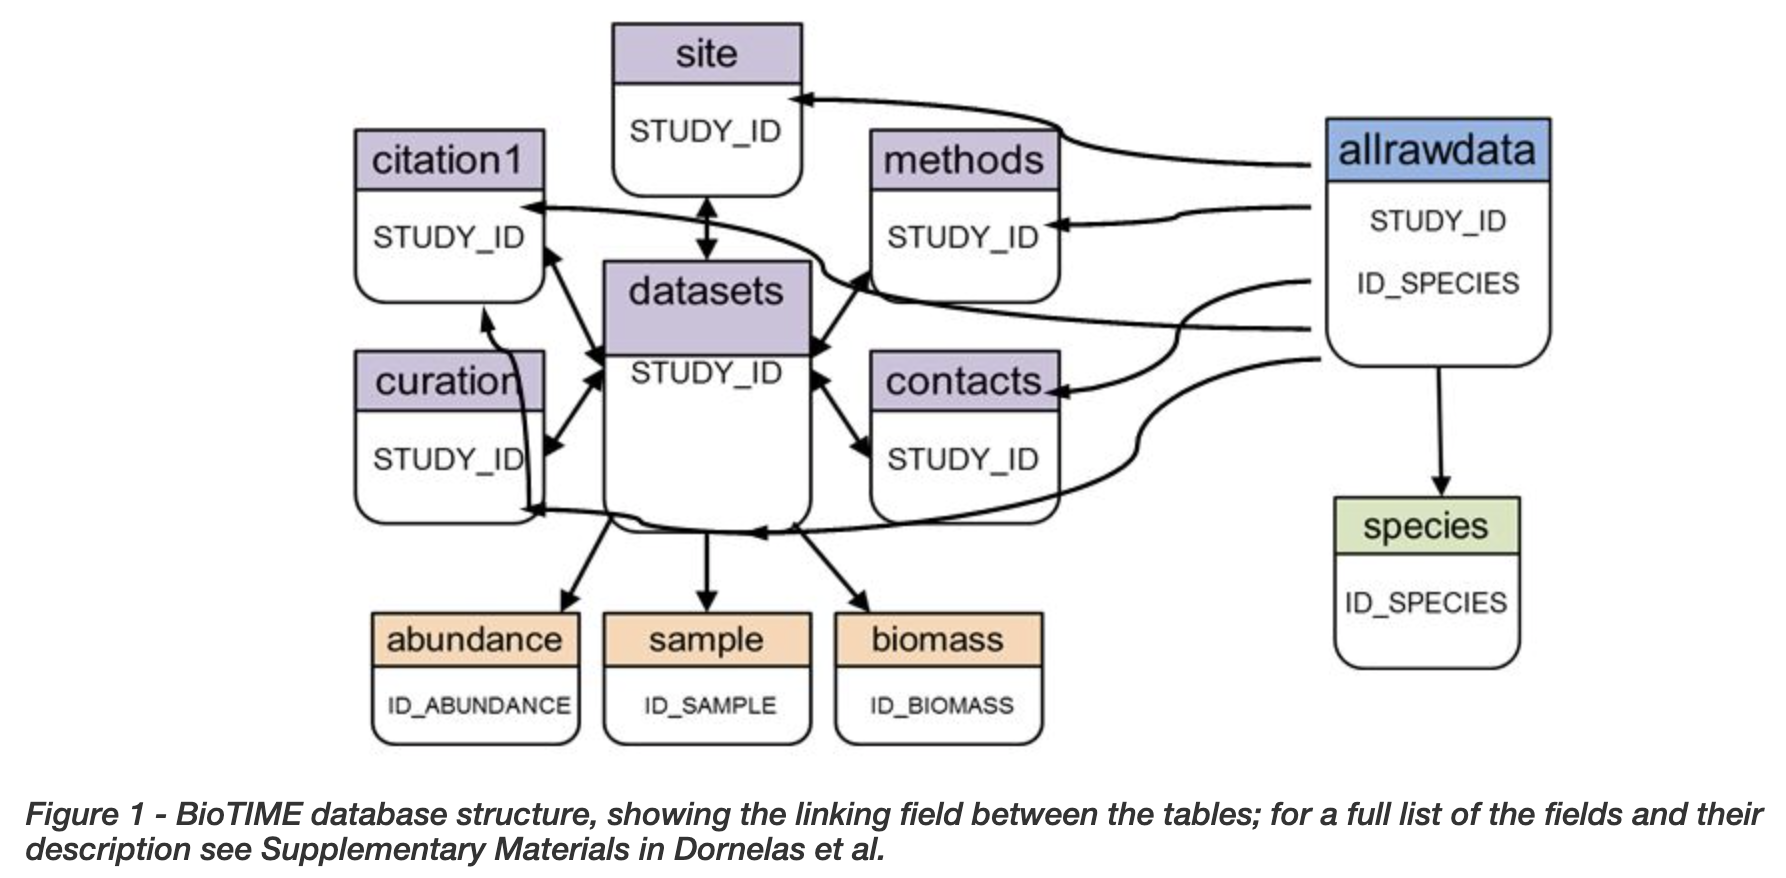<br>
</center>

Figure from [https://biotime.st-andrews.ac.uk/downloads/interactBioTIME.html](https://biotime.st-andrews.ac.uk/downloads/interactBioTIME.html).

- The provided `csv` file of raw data is obtained from [the following query](https://biotime.st-andrews.ac.uk/downloads/interactBioTIME.html) (which apparently _"can take several hours to run"_):
```
fullQuery<-dbGetQuery(myConnection, "SELECT allrawdata.STUDY_ID, allrawdata.DAY, allrawdata.MONTH, allrawdata.YEAR, allrawdata.SAMPLE_DESC, allrawdata.PLOT, allrawdata.ID_SPECIES, allrawdata.LATITUDE,
allrawdata.LONGITUDE, sum(allrawdata.ABUNDANCE), sum(allrawdata.BIOMASS), species.GENUS, species.SPECIES, species.GENUS_SPECIES from allrawdata inner join site on allrawdata.STUDY_ID=site.STUDY_ID inner join
species on allrawdata.ID_SPECIES=species.ID_SPECIES group by concat(allrawdata.STUDY_ID, allrawdata.DAY, allrawdata.MONTH, allrawdata.YEAR, allrawdata.SAMPLE_DESC, allrawdata.ID_SPECIES, allrawdata.LATITUDE,
allrawdata.LONGITUDE)")
```


In [2]:
from collections import Counter
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly.express as px
import seaborn as sns
import sqlite3

In [21]:
# load the csv data into DataFrames
# we need to change the default encoding for citations and metadata: in cp437 all characters should be defined
query_csv = pd.read_csv(open('data/BioTIMEQuery_24_06_2021.csv', 'rb'), index_col=0)
citations_csv = pd.read_csv(open('data/BioTIMECitations_24_06_2021.csv', 'rb'), encoding='cp437')
metadata_csv = pd.read_csv(open('data/BioTIMEMetadata_24_06_2021.csv', 'rb'), encoding='cp437')

print(f"Query csv shape: {query_csv.shape}")
print(f"Citations csv shape: {citations_csv.shape}")
print(f"Metadata csv shape: {metadata_csv.shape}")

print(f"\nColumns for query_csv:\n{list(query_csv.columns)}")

<ipython-input-21-dbb5832539ae>:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  query_csv = pd.read_csv(open('data/BioTIMEQuery_24_06_2021.csv', 'rb'), index_col=0)


Query csv shape: (8552249, 14)
Citations csv shape: (610, 2)
Metadata csv shape: (381, 42)

Columns for query_csv:
['STUDY_ID', 'DAY', 'MONTH', 'YEAR', 'SAMPLE_DESC', 'PLOT', 'ID_SPECIES', 'LATITUDE', 'LONGITUDE', 'sum.allrawdata.ABUNDANCE', 'sum.allrawdata.BIOMASS', 'GENUS', 'SPECIES', 'GENUS_SPECIES']


- `BioTIMEMetadata_24_06_2021.csv` columns account for almost all the fields of the database tables, except for `allrawdata` which has its dedicated `csv` from a different query. Excluded fields are: 
    - `datasets.AB_TYPE`, `datasets.BIO_TYPE`, `datasets.SAMPLE_TYPE` 
    - `site.CEN_LATITUDE`, `site.CEN_LONGITUDE`, `site.AREA`
    - `species.GENUS`, `species.SPECIES`, `species.GENUS_SPECIES`
    - `citation1.CITATION_LINE` (might correspond to TITLE) and `citation1.EN`

In [29]:
# load all the db tables separately
table_names = ['abundance', 'allrawdata', 'biomass', 'citation1', 'contacts', 'curation', 
               'datasets', 'methods', 'sample', 'site', 'species']
dfs = dict.fromkeys(table_names)

conn = sqlite3.connect("data/biotime.db")
for table in table_names:
    query = f"SELECT * FROM {table};"
    dfs[table] = pd.read_sql_query(query, conn)

In [31]:
dfs['allrawdata'].shape

(8771034, 13)

In [70]:
study_ids = dfs['allrawdata']['STUDY_ID'].unique()
differences = {}
for i in study_ids:
    if dfs['allrawdata']['STUDY_ID'].value_counts()[i] != query_csv['STUDY_ID'].value_counts()[i]:
        differences[i] = dfs['allrawdata']['STUDY_ID'].value_counts()[i] - query_csv['STUDY_ID'].value_counts()[i]

In [72]:
sum(differences.values())

218785

- There are 381 unique studies.
- There's a difference of 218,785 records between the `allrawdata` table and `csv`, which might be due to inner joins (with `site`, `species`) or because of grouping. 

**TODO: maybe this needs more digging, not sure the difference is clear to me (cf. record structure)** Some notes:
- `allrawdata` table can have entries with same YEAR and STUDY_ID, but different ID_SPECIES (example: study 60 in 1982.


### 6. What is the data coverage and resolution 

- 

In [75]:
dfs['datasets'].loc[dfs['datasets']['STUDY_ID']==60]

,ID_DATASETS,STUDY_ID,TAXA,ORGANISMS,TITLE,AB_BIO,HAS_PLOT,DATA_POINTS,START_YEAR,END_YEAR,...,NUMBER_OF_SPECIES,NUMBER_OF_SAMPLES,NUMBER_LAT_LONG,TOTAL,GRAIN_SIZE_TEXT,GRAIN_SQ_KM,AREA_SQ_KM,AB_TYPE,BIO_TYPE,SAMPLE_TYPE
16,19,60,Terrestrial plants,tropical woody plants,Forest Census Plot on Barro Colorado Island,A,S,8,1982,2015,...,325,8,1,2429,50 ha plot,0.5,0.5,1,1,2


In [86]:
dfs['allrawdata'].loc[(dfs['allrawdata']['STUDY_ID']==60) & (dfs['allrawdata']['YEAR']==1982)][['ABUNDANCE', 'SAMPLE_DESC', 'ID_SPECIES']]

,ABUNDANCE,SAMPLE_DESC,ID_SPECIES
133,10.0,9.152100_-79.846500_Panama_Gatun_BarroColorado...,13
143,1562.0,9.152100_-79.846500_Panama_Gatun_BarroColorado...,15
149,79.0,9.152100_-79.846500_Panama_Gatun_BarroColorado...,16
1556,346.0,9.152100_-79.846500_Panama_Gatun_BarroColorado...,49
1632,136.0,9.152100_-79.846500_Panama_Gatun_BarroColorado...,55
...,...,...,...
8700152,1.0,9.152100_-79.846500_Panama_Gatun_BarroColorado...,51363
8700153,2.0,9.152100_-79.846500_Panama_Gatun_BarroColorado...,51364
8700154,3.0,9.152100_-79.846500_Panama_Gatun_BarroColorado...,36303
8700155,1.0,9.152100_-79.846500_Panama_Gatun_BarroColorado...,45049


In [85]:
query_csv.loc[(query_csv['STUDY_ID']==60) & (query_csv['YEAR']==1982)][['sum.allrawdata.ABUNDANCE', 'SAMPLE_DESC', 'ID_SPECIES']]

,sum.allrawdata.ABUNDANCE,SAMPLE_DESC,ID_SPECIES
8466605,23444.0,9.152100_-79.846500_Panama_Gatun_BarroColorado...,1017
8466606,1.0,9.152100_-79.846500_Panama_Gatun_BarroColorado...,1031
8466607,15.0,9.152100_-79.846500_Panama_Gatun_BarroColorado...,1033
8466608,9.0,9.152100_-79.846500_Panama_Gatun_BarroColorado...,1040
8466609,10.0,9.152100_-79.846500_Panama_Gatun_BarroColorado...,1042
...,...,...,...
8466903,105.0,9.152100_-79.846500_Panama_Gatun_BarroColorado...,881
8466904,809.0,9.152100_-79.846500_Panama_Gatun_BarroColorado...,894
8466905,964.0,9.152100_-79.846500_Panama_Gatun_BarroColorado...,902
8466906,524.0,9.152100_-79.846500_Panama_Gatun_BarroColorado...,912
